<a href="https://colab.research.google.com/github/liptiavenica/Menjelajahi-Dunia-Machine-Learning/blob/master/Bab%203/E%20-%20K%20Nearest%20Neigbours%20(KNN)/Praktikum_K_Nearest_Neigbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum K-Nearest Neigbours**

## Load dataset

In [1]:
import pandas as pd
import numpy as np

Import Dataset

In [2]:
# hapus komen jika mengambil data langsung melalui github memasukan data menggunakan upload file
# url = "https://raw.githubusercontent.com/liptiavenica/Menjelajahi-Dunia-Machine-Learning/master/Bab%203/E%20-%20K%20Nearest%20Neigbours%20(KNN)/Latihan/data_travel_insurance.csv"

url = 'data_travel_insurance.csv'
df = pd.read_csv(url)

In [3]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


## **Preprocessing & EDA**

In [4]:
# Cek data null
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

Hapus kolom gender karena sebagian besar nilainya nol

In [5]:
df=df.drop(['Gender'], axis=1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


In [6]:
df.columns = ["agency", "agency_type", "dist_channel", "product_name", "duration", "destination", "net_sales", "commision", "age", "claim"]

In [7]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Data unik dari',key,'adalah: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Data unik dari agency adalah: 
['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'SSI' 'RAB' 'KML' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Data unik dari agency_type adalah: 
['Airlines' 'Travel Agency']

Data unik dari dist_channel adalah: 
['Online' 'Offline']

Data unik dari product_name adalah: 
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan' 'Premier Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Platinum' 'Spouse or Parents Comprehensive Plan'
 'Travel Cruise Protect Family']

Data unik dari destination adalah: 
['SINGAPORE' 'MALAYSIA'

In [8]:
import plotly.express as px

df1 = df.groupby(by=["destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['destination_new'] = np.where(df1['counts']>1090, df1['destination'], 'Others')
fig = px.pie(df1, values='counts', names='destination_new', title='Tujuan Populer di kalangan tertanggung')
fig.show()

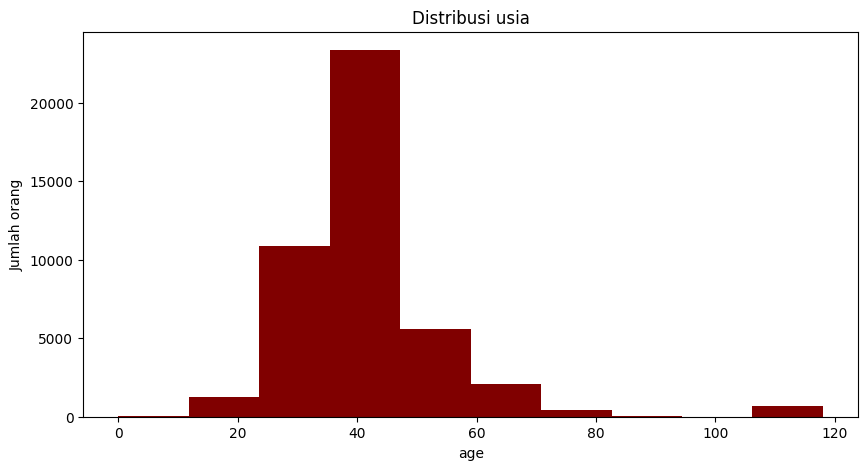

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
plt.hist(df['age'], color ='maroon')
plt.xlabel("age")
plt.ylabel("Jumlah orang")
plt.title("Distribusi usia")
plt.show()

Berdasarkan histogram tersebut, mayoritas masyarakat yang memilih asuransi perjalanan berusia **35 hingga 50 tahun**.

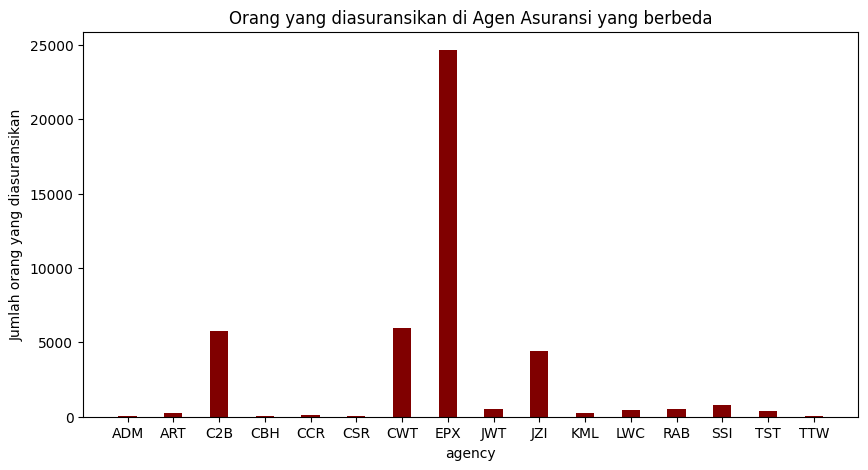

In [10]:
df2 = df.groupby(by=["agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['agency'], df2['counts'], color ='maroon', width = 0.4)
plt.xlabel("agency")
plt.ylabel("Jumlah orang yang diasuransikan")
plt.title("Orang yang diasuransikan di Agen Asuransi yang berbeda")
plt.show()

Mayoritas orang diasuransikan di bawah agen **EPX**.

In [11]:
df3 = df.groupby(by=["product_name"]).size().reset_index(name="counts")
fig = px.pie(df3, values='counts', names='product_name', title='Orang diasuransikan dengan rencana yang berbeda')
fig.show()

Grafik pie chart menunjukan bahwa mayoritas orang yang diasuransikan perjalanan telah memilih ***Cancellation Plan* (Rencana Pembatalan)**

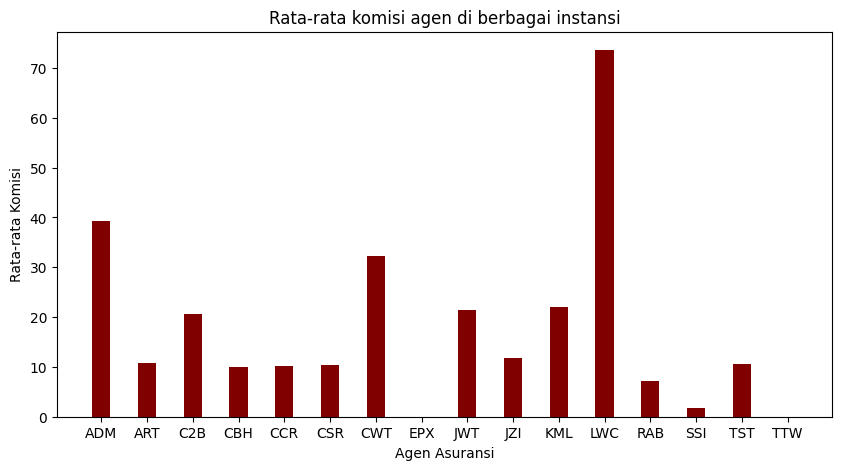

In [12]:
df4 = df.groupby(by=['agency'])['commision'].mean().reset_index()
df4.head()

fig = plt.figure(figsize = (10, 5))
plt.bar(df4['agency'], df4['commision'], color ='maroon', width = 0.4)
plt.xlabel("Agen Asuransi")
plt.ylabel("Rata-rata Komisi")
plt.title("Rata-rata komisi agen di berbagai instansi")
plt.show()

LWC merupakan agensi yang memberikan komisi maksimal kepada agennya sedangkan EPX tidak memberikan komisi.

In [13]:
df.head(1)

,agency,agency_type,dist_channel,product_name,duration,destination,net_sales,commision,age,claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No


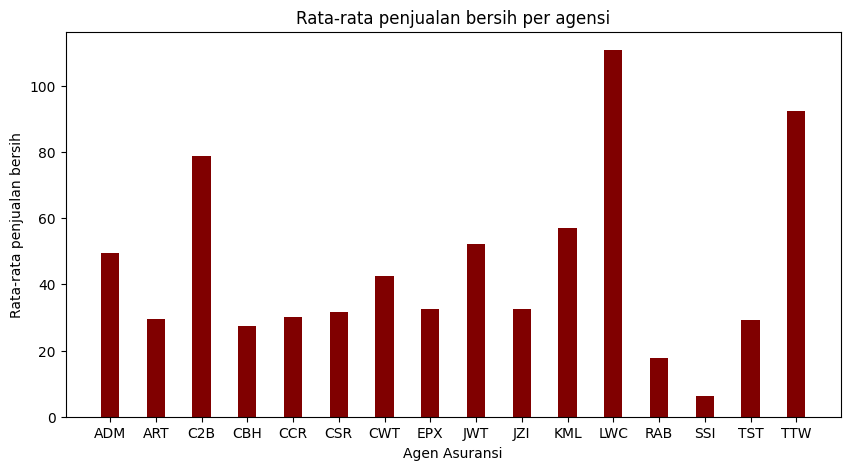

In [14]:
# Hitung rata-rata 'net_sales' yang dikelompokkan berdasarkan 'agensi' dan setel ulang indeks
df5 = df.groupby(by=['agency'])['net_sales'].mean().reset_index()

fig = plt.figure(figsize = (10, 5))
plt.bar(df5['agency'], df5['net_sales'], color ='maroon', width = 0.4)
plt.xlabel("Agen Asuransi")
plt.ylabel("Rata-rata penjualan bersih")
plt.title("Rata-rata penjualan bersih per agensi")
plt.show()

Penjualan bersih tertinggi untuk LWC dan terendah untuk SSI.

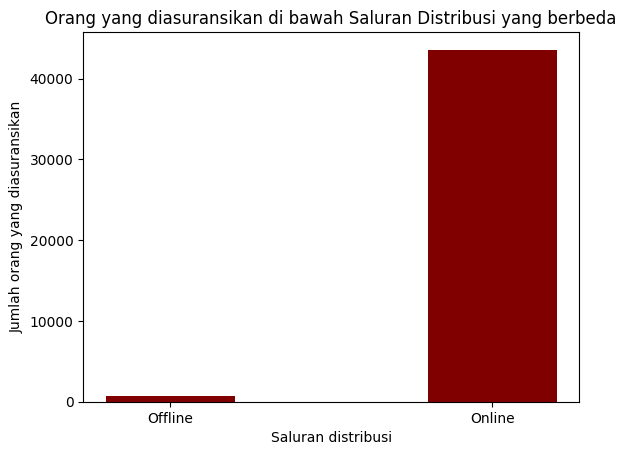

In [15]:
df6=df.groupby(by=['dist_channel']).size().reset_index(name="counts")
plt.bar(df6['dist_channel'], df6['counts'], color ='maroon',width = 0.4)
plt.xlabel("Saluran distribusi")
plt.ylabel("Jumlah orang yang diasuransikan")
plt.title("Orang yang diasuransikan di bawah Saluran Distribusi yang berbeda")
plt.show()

Mayoritas masyarakat memilih saluran distribusi asuransi moda online.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 4.5 MB/s eta 0:00:00


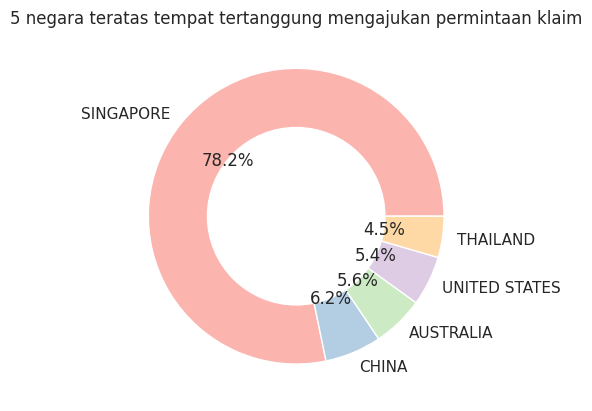

In [16]:
!pip install palettable -q
import seaborn as sns
from palettable.colorbrewer.qualitative import Pastel1_7

sns.set(style="whitegrid")
df_yes=df.loc[df['claim']=='Yes']
df_= df_yes.groupby(by=["destination"]).size().reset_index(name="counts")
df_=df_.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df_['counts'], labels=df_['destination'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('5 negara teratas tempat tertanggung mengajukan permintaan klaim')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Singapura berada di puncak daftar dengan jumlah maksimum permintaan klaim yang diajukan

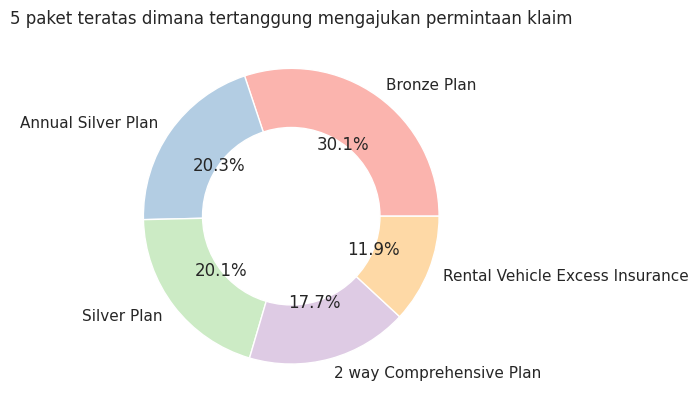

In [17]:
df_= df_yes.groupby(by=["product_name"]).size().reset_index(name="counts")
df_=df_.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df_['counts'], labels=df_['product_name'], autopct='%1.1f%%',colors=Pastel1_7.hex_colors)
plt.title('5 paket teratas dimana tertanggung mengajukan permintaan klaim')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Permintaan klaim mayoritas berasal dari Bronze Plan dan Annual Silver Plan.

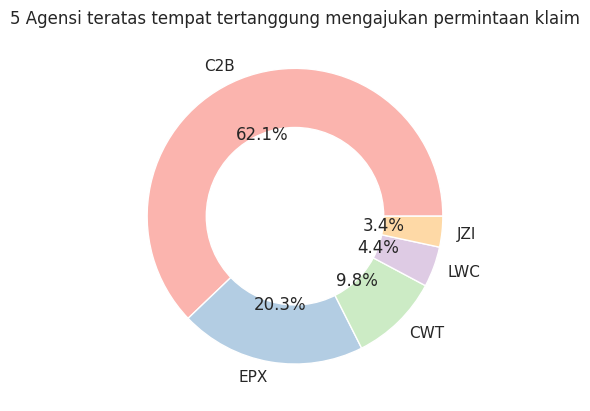

In [18]:
df_= df_yes.groupby(by=["agency"]).size().reset_index(name="counts")
df_=df_.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df_['counts'], labels=df_['agency'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('5 Agensi teratas tempat tertanggung mengajukan permintaan klaim')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Permintaan klaim maksimal sudah sampai pada lembaga bernama C2B

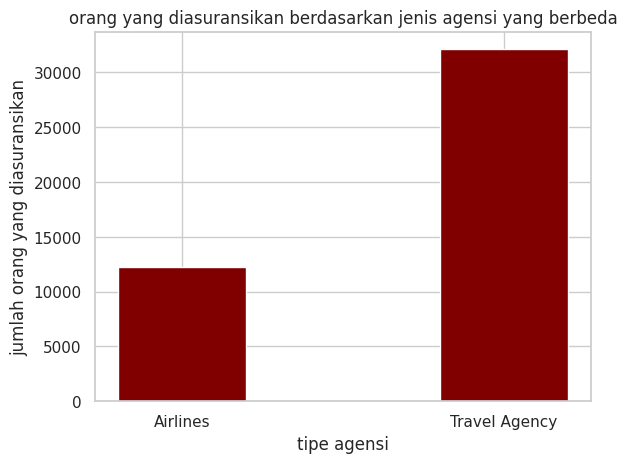

In [19]:
df_=df.groupby(by=['agency_type']).size().reset_index(name="counts")
plt.bar(df_['agency_type'], df_['counts'], color ='maroon',width = 0.4)
plt.xlabel("tipe agensi")
plt.ylabel("jumlah orang yang diasuransikan")
plt.title("orang yang diasuransikan berdasarkan jenis agensi yang berbeda")
plt.show()

Mayoritas orang mendapatkan asuransi melalui ***Travel Agency* (Agen Perjalanan)**

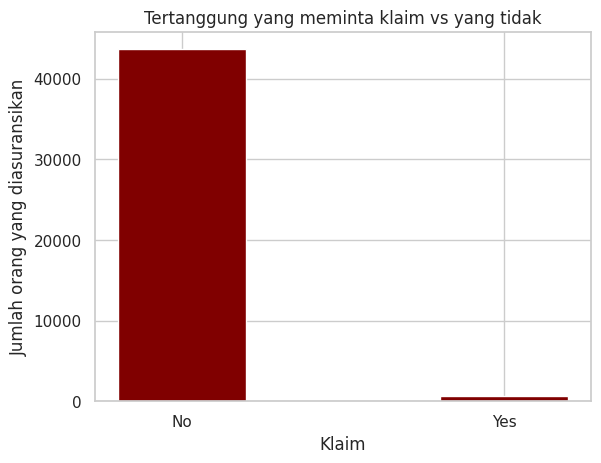

In [20]:
df_ = df.groupby(by=["claim"]).size().reset_index(name="counts")
plt.bar(df_['claim'], df_['counts'], color ='maroon',width = 0.4)
plt.xlabel("Klaim")
plt.ylabel("Jumlah orang yang diasuransikan")
plt.title("Tertanggung yang meminta klaim vs yang tidak")
plt.show()

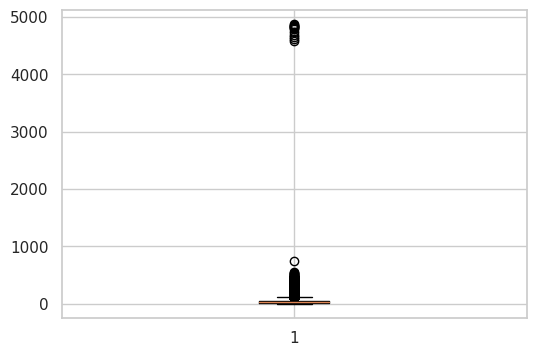

In [21]:
fig = plt.figure(figsize =(6,4 ))
plt.boxplot(df['duration'])
plt.show()

Boxplot menunjukkan distribusi data fitur Durasi. Kita dapat melihat bahwa ada beberapa outlier yang menggambarkan nilai durasi negatif yaitu Waktu yang idealnya tidak mungkin dilakukan.

In [22]:
df['duration'].describe()

count    44328.000000
mean        49.424292
std        109.153961
min         -1.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: duration, dtype: float64

In [23]:
# Menghilangkan nilai negatif kolom 'duration'
index_duration = df[df['duration'] < 0 ].index
df.drop(index_duration, inplace = True)

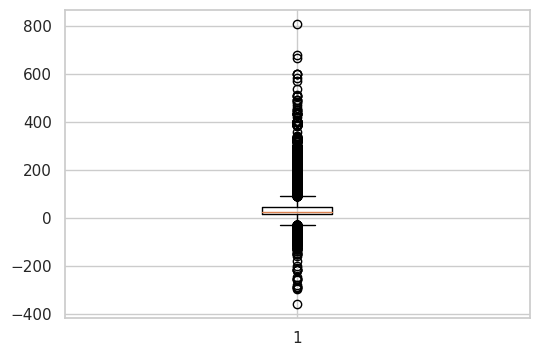

In [75]:
fig = plt.figure(figsize =(6,4))
plt.boxplot(df['net_sales'])
plt.show()

In [76]:
df['net_sales'].describe()

count    44326.000000
mean        40.551966
std         48.662832
min       -357.500000
25%         18.000000
50%         26.500000
75%         48.000000
max        810.000000
Name: net_sales, dtype: float64

In [77]:
# Menghilangkan nilai negatif kolom 'net_sales'
index_duration = df[df['net_sales'] < 0 ].index
df.drop(index_duration, inplace = True)

## Encode label
digunakan untuk mengubah fitur kategorikal

In [24]:
from sklearn import preprocessing

label_encoder1 = preprocessing.LabelEncoder()
df['agency']= label_encoder1.fit_transform(df['agency'])

label_encoder2 = preprocessing.LabelEncoder()
df['agency_type']= label_encoder2.fit_transform(df['agency_type'])

label_encoder3 = preprocessing.LabelEncoder()
df['dist_channel']= label_encoder3.fit_transform(df['dist_channel'])

label_encoder4 = preprocessing.LabelEncoder()
df['product_name']= label_encoder4.fit_transform(df['product_name'])

label_encoder5 = preprocessing.LabelEncoder()
df['claim']= label_encoder5.fit_transform(df['claim'])

label_encoder6 = preprocessing.LabelEncoder()
df['destination']= label_encoder6.fit_transform(df['destination'])

In [78]:
df

,agency,agency_type,dist_channel,product_name,duration,destination,net_sales,commision,age,claim
0,2,0,1,4,365,110,216.0,54.00,57,0
1,7,1,1,10,4,74,10.0,0.00,33,0
2,9,0,1,8,19,52,22.0,7.70,26,0
3,7,1,1,1,20,130,112.0,0.00,59,0
4,2,0,1,9,8,110,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,7,1,1,1,14,23,30.0,0.00,36,1
44324,6,1,1,16,17,3,79.2,47.52,47,0
44325,14,1,0,23,64,120,30.0,10.50,50,0
44326,7,1,1,1,51,23,36.0,0.00,36,0


## Correlation Matrix

<Axes: >

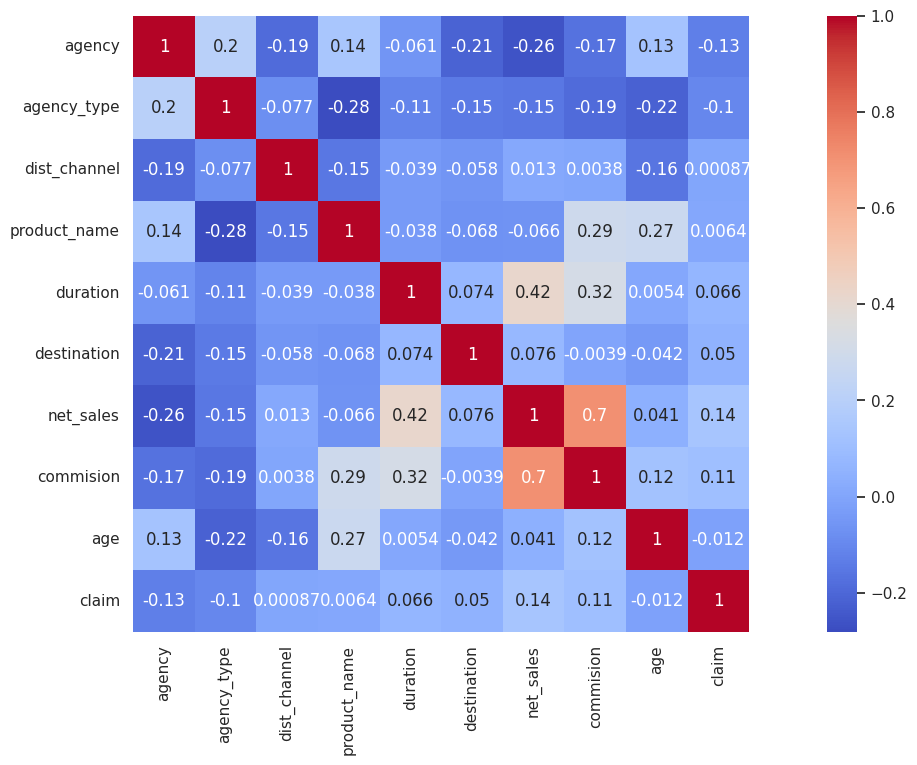

In [79]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

Correlation matrix digunakan untuk memeriksa derajat kolinearitas yang dimiliki setiap fitur individu dengan label keluaran. Dapat dilihat tidak ada kolinearitas yang tinggi di antara fitur-fitur tersebut.

### Memisahkan fitur dan variabel target menjadi X dan y

In [80]:
y=df.iloc[:,[-1]]
X=df.drop(y.columns,axis = 1)

In [81]:
X

,agency,agency_type,dist_channel,product_name,duration,destination,net_sales,commision,age
0,2,0,1,4,365,110,216.0,54.00,57
1,7,1,1,10,4,74,10.0,0.00,33
2,9,0,1,8,19,52,22.0,7.70,26
3,7,1,1,1,20,130,112.0,0.00,59
4,2,0,1,9,8,110,16.0,4.00,28
...,...,...,...,...,...,...,...,...,...
44323,7,1,1,1,14,23,30.0,0.00,36
44324,6,1,1,16,17,3,79.2,47.52,47
44325,14,1,0,23,64,120,30.0,10.50,50
44326,7,1,1,1,51,23,36.0,0.00,36


In [82]:
y

,claim
0,0
1,0
2,0
3,0
4,0
...,...
44323,1
44324,0
44325,0
44326,0


### Handle imbalance dataset

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape variabel X sebelum SMOTE: {X.shape}
Shape variabel X sesudah SMOTE: {X_sm.shape}''')
print('\nKeseimbangan kelas positif dan negatif (%):')
y_sm.value_counts(normalize=True) * 100

Shape variabel X sebelum SMOTE: (43843, 9)
Shape variabel X sesudah SMOTE: (86332, 9)

Keseimbangan kelas positif dan negatif (%):


claim
0        50.0
1        50.0
Name: proportion, dtype: float64

SMOTE dilakukan untuk menangani ketidakseimbangan kelas target dengan melakukan oversampling.

In [84]:
X_sm

,agency,agency_type,dist_channel,product_name,duration,destination,net_sales,commision,age
0,2,0,1,4,365,110,216.000000,54.000000,57
1,7,1,1,10,4,74,10.000000,0.000000,33
2,9,0,1,8,19,52,22.000000,7.700000,26
3,7,1,1,1,20,130,112.000000,0.000000,59
4,2,0,1,9,8,110,16.000000,4.000000,28
...,...,...,...,...,...,...,...,...,...
86327,2,0,1,9,11,110,22.537705,5.634426,27
86328,2,0,1,4,365,110,187.269150,46.814842,37
86329,2,0,1,4,367,110,398.018499,99.504625,43
86330,2,0,1,9,12,110,27.000000,6.750000,40


In [85]:
y_sm

,claim
0,0
1,0
2,0
3,0
4,0
...,...
86327,1
86328,1
86329,1
86330,1


### MinMaxScaler
Penskalaan dilakukan untuk menjaga nilai dalam rentang 0 dan 1.

In [33]:
# from sklearn.preprocessing import MinMaxScaler

# X_new=pd.DataFrame()
# to_scale = X_sm.columns
# mms = MinMaxScaler()
# X_new[to_scale] = mms.fit_transform(X_sm[to_scale])
# X_new.head()

## Feature Selection

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [86]:
y = y_sm.values.ravel()

In [87]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_sm, y)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

# Pilih atribut prediktor dgn highest scores
features = fs.transform(X_sm)

Feature 0: 25037.679354
Feature 1: 22281.093558
Feature 2: 25.181682
Feature 3: 2.348420
Feature 4: 4570.481723
Feature 5: 4324.175446
Feature 6: 11201.390405
Feature 7: 8482.054986
Feature 8: 634.109675


In [113]:
#ambil hanya feature dengan index 0,1,4,5,6,7 (yang skornya paling tinggi)

slicing = [0,1,4,5,6,7]

x = X_sm.iloc[:, slicing]
x.head()

,agency,agency_type,duration,destination,net_sales,commision
0,2,0,365,110,216.0,54.0
1,7,1,4,74,10.0,0.0
2,9,0,19,52,22.0,7.7
3,7,1,20,130,112.0,0.0
4,2,0,8,110,16.0,4.0


In [97]:
y = y.ravel()
y

array([0, 0, 0, ..., 1, 1, 1])

data untuk prediksi sudah sesuai

In [112]:
x.shape

(86332, 6)

In [95]:
y.shape

(86332, 1)

## Train and Evaluation

In [43]:
# Kita akan pakai k-fold cross validation untuk evaluasinya
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Accuracy Score')

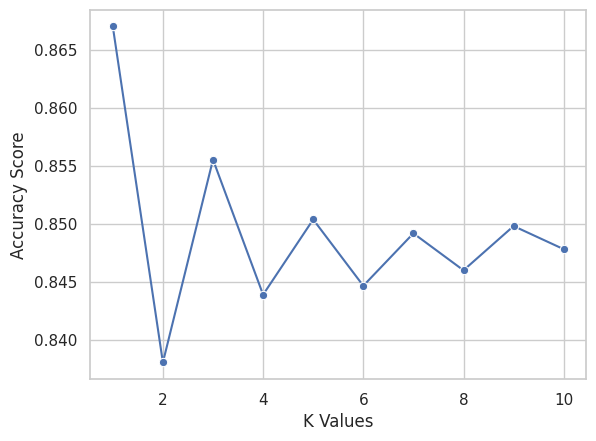

In [107]:
k_values = [i for i in range (1,11)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

berdasarkan hasil evaluasi di atas, kita akan pilih nilai K untuk model KNN yaitu 3

In [109]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [110]:
# Train the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.920773730236868


In [114]:
x.head()

,agency,agency_type,duration,destination,net_sales,commision
0,2,0,365,110,216.0,54.0
1,7,1,4,74,10.0,0.0
2,9,0,19,52,22.0,7.7
3,7,1,20,130,112.0,0.0
4,2,0,8,110,16.0,4.0


## Pembuatan Model Final

In [128]:
# Jika sudah ditemukan kombinasi atribut dan nilai K yang dapat menghasilkan model terbaik
# Saatnya membuat model finalnya
# Ingat, gunakan K terbaik dan seluruh baris di dataset iris (namun hanya diambil atribut2 fitur yang paling signifikan saja)
# Gunakan juga atribut label yang telah ditransformasi ke nilai numerik
kNN_model = KNeighborsClassifier(n_neighbors=3)
kNN_model.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [129]:
import pickle

#Simpan model dgn nama: ....pkl
pkl_filename = "/content/drive/MyDrive/knn_model_travel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(kNN_model, file)

In [130]:
# gunakan model untuk memprediksi data baru
#Load/baca model yg sudah disimpan

pkl_filename = "/content/drive/MyDrive/knn_model_travel.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model_kNN = pickle.load(file)


In [126]:
# tampilkan nilai minimum and maximum value x dalam bentuk tabel

import pandas as pd

df = pd.DataFrame({'Minimum': x.min(), 'Maximum': x.max()})
print(df)

             Minimum  Maximum
agency           0.0     15.0
agency_type      0.0      1.0
duration         0.0   4881.0
destination      0.0    137.0
net_sales        0.0    810.0
commision        0.0    283.5


In [132]:
# buat array baru untuk prediksi berdasarkan fitur yang dipilih

new_data = [[12, 1, 759, 123, 394, 170]]
prediction = loaded_model_kNN.predict(new_data)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



Output = [0], artinya penanggung tidak melakukan klaim asuransi